In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import zscore
import os


In [5]:
#df = pd.read_csv("../data/benin-malanville.csv")
df = pd.read_csv("D:/kaimtenx/solar-challenge-week1/data/benin-malanville.csv")
df.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN

In [ ]:
# Convert Timestamp column to datetime if needed
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Summary statistics for all numeric columns
summary_stats = df.describe()
# Display results
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                            Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%

In [6]:


# Missing values per column
missing_values = df.isna().sum()

# Percentage of missing values
missing_percent = (missing_values / len(df)) * 100

# Columns with more than 5% missing data
columns_gt_5pct_null = missing_percent[missing_percent > 5]


print("\nMissing Values Count:\n", missing_values)
print("\nColumns with >5% Missing Values:\n", columns_gt_5pct_null)


Missing Values Count:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Columns with >5% Missing Values:
 Comments    100.0
dtype: float64


In [7]:
# Convert timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# ----- STEP 1: Focused columns for outlier and missing-value checks -----
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

In [8]:
# ----- STEP 2: Outlier Detection using Z-score -----
z_scores = df[key_columns].apply(zscore)

# Flag rows with any |Z| > 3
outliers = (np.abs(z_scores) > 3)
df['OutlierFlag'] = outliers.any(axis=1)

# Optional: Print number of outliers
print("Number of rows flagged as outliers:", df['OutlierFlag'].sum())

# ----- STEP 3: Drop or impute missing values -----
# Impute missing values with the column median for key columns
for col in key_columns:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Drop rows with missing timestamps or critical data if still present
df.dropna(subset=['Timestamp'], inplace=True)

# ----- STEP 4: Drop Outliers or Keep for Further Labeling -----
# Option 1: Remove outliers
df_clean = df[~df['OutlierFlag']].copy()

# Option 2: Keep all data and just tag outliers
# df_clean = df.copy()

# Drop the helper column if no longer needed
df_clean.drop(columns='OutlierFlag', inplace=True)

Number of rows flagged as outliers: 7740


In [9]:
# ----- STEP 5: Export cleaned DataFrame -----
# Ensure target directory exists
output_path = "../data/benin_clean.csv"
os.makedirs("data", exist_ok=True)

# Save the cleaned CSV
df_clean.to_csv(output_path, index=False)

print(f"Cleaned data saved to: {output_path}")

Cleaned data saved to: ../data/benin_clean.csv


In [10]:
# Load the cleaned data
df = pd.read_csv("../data/benin_clean.csv")

<Figure size 1400x600 with 0 Axes>

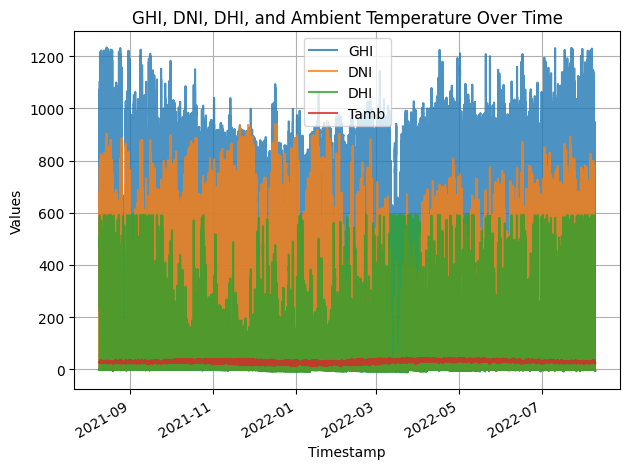

In [11]:
# Convert Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index (optional but helpful)
df.set_index('Timestamp', inplace=True)

# ----- PLOT 1: Line plots of GHI, DNI, DHI, Tamb over time -----
plt.figure(figsize=(14, 6))
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(alpha=0.8)
plt.title("GHI, DNI, DHI, and Ambient Temperature Over Time")
plt.ylabel("Values")
plt.xlabel("Timestamp")
plt.grid(True)
plt.tight_layout()
plt.show()

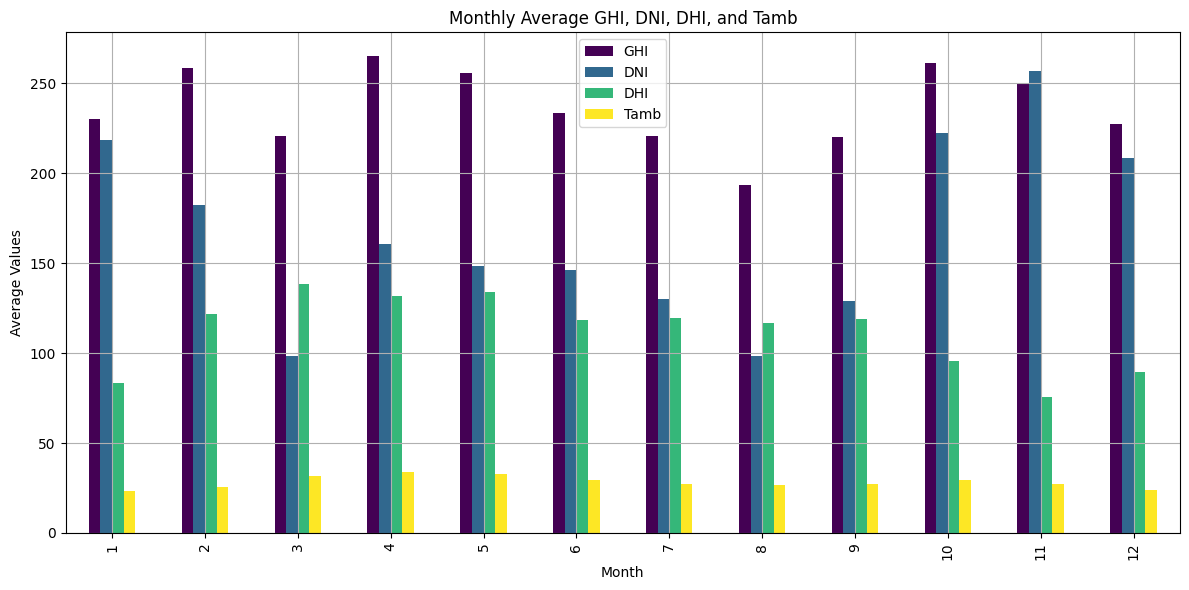

In [12]:
# Add month column
df['Month'] = df.index.month

# Monthly average plot
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

monthly_avg.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Monthly Average GHI, DNI, DHI, and Tamb")
plt.ylabel("Average Values")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

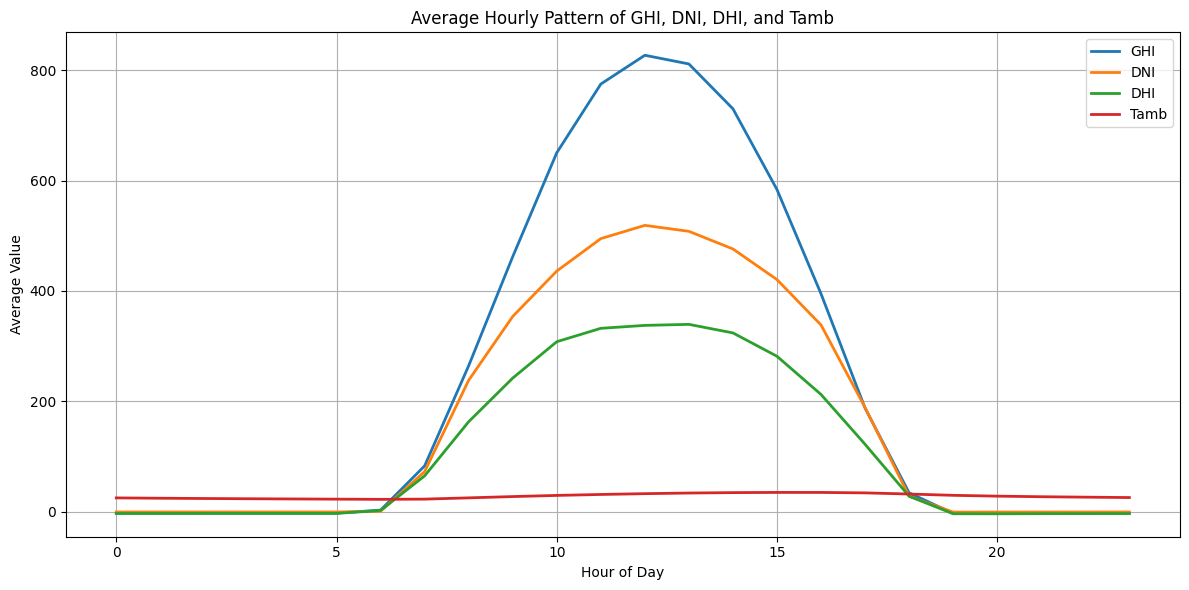

In [13]:
# Add hour column
df['Hour'] = df.index.hour

# Plot average by hour
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

hourly_avg.plot(figsize=(12, 6), linewidth=2)
plt.title("Average Hourly Pattern of GHI, DNI, DHI, and Tamb")
plt.xlabel("Hour of Day")
plt.ylabel("Average Value")
plt.grid(True)
plt.tight_layout()
plt.show()

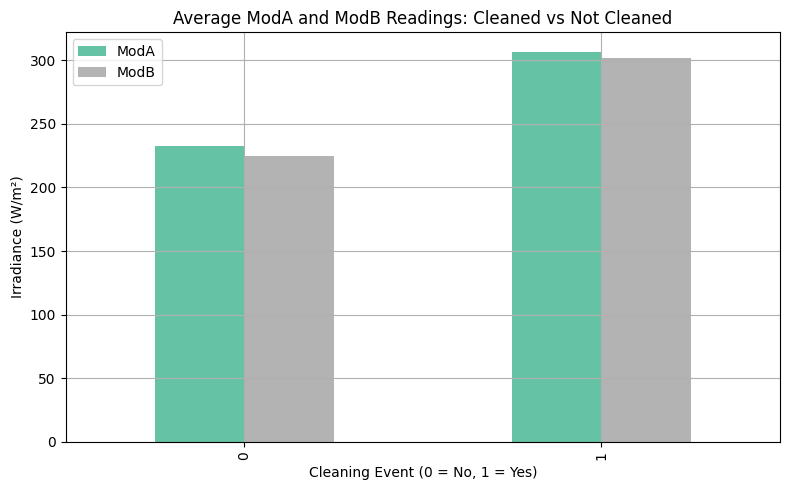

In [14]:
#	Cleaning Impact Group by Cleaning flag and plot average ModA & ModB pre/post-clean.
# Group by Cleaning flag (0 = not cleaned, 1 = cleaned)
mod_means = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Bar plot to compare ModA and ModB before and after cleaning
mod_means.plot(kind='bar', figsize=(8, 5), colormap='Set2')
plt.title("Average ModA and ModB Readings: Cleaned vs Not Cleaned")
plt.xlabel("Cleaning Event (0 = No, 1 = Yes)")
plt.ylabel("Irradiance (W/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()


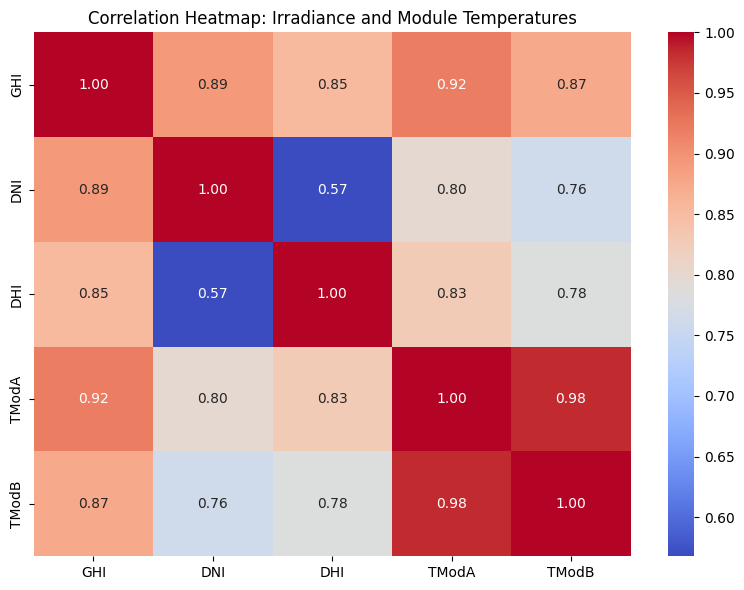

In [15]:
#Correlation & Relationship Analysis  Correlation Heatmap
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Irradiance and Module Temperatures")
plt.tight_layout()
plt.show()

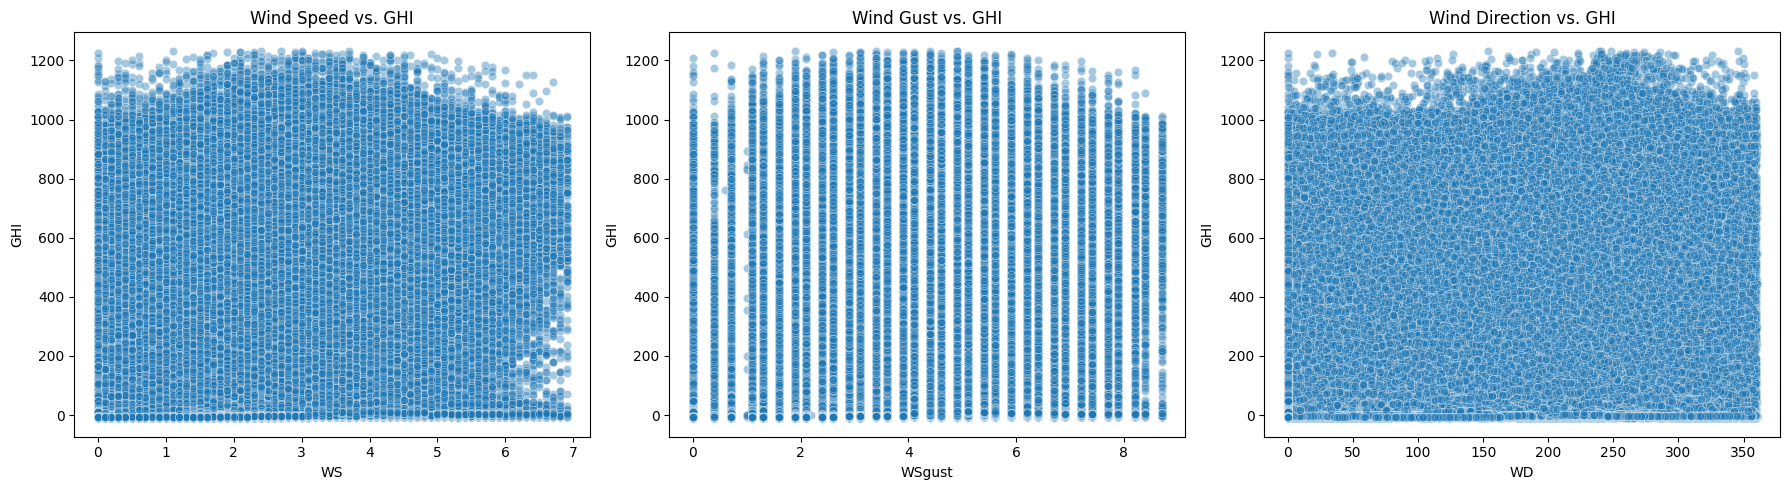

In [18]:
#Scatter Plots for Variable Relationships
# Wind Speed & Gust vs. GHI
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(ax=axes[0], data=df, x='WS', y='GHI', alpha=0.4)
axes[0].set_title("Wind Speed vs. GHI")

sns.scatterplot(ax=axes[1], data=df, x='WSgust', y='GHI', alpha=0.4)
axes[1].set_title("Wind Gust vs. GHI")

sns.scatterplot(ax=axes[2], data=df, x='WD', y='GHI', alpha=0.4)
axes[2].set_title("Wind Direction vs. GHI")

plt.tight_layout()
plt.show()


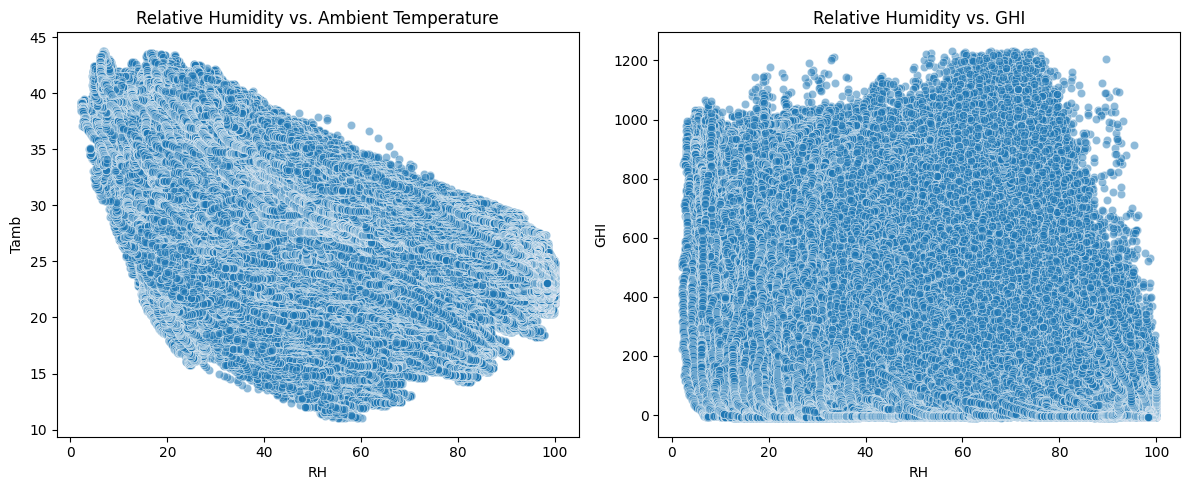

In [19]:
# RH vs Tamb and RH vs GHI
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(ax=axes[0], data=df, x='RH', y='Tamb', alpha=0.5)
axes[0].set_title("Relative Humidity vs. Ambient Temperature")

sns.scatterplot(ax=axes[1], data=df, x='RH', y='GHI', alpha=0.5)
axes[1].set_title("Relative Humidity vs. GHI")

plt.tight_layout()
plt.show()


In [20]:
#Wind Rose (using windrose library)
from windrose import WindroseAxes
import matplotlib.pyplot as plt

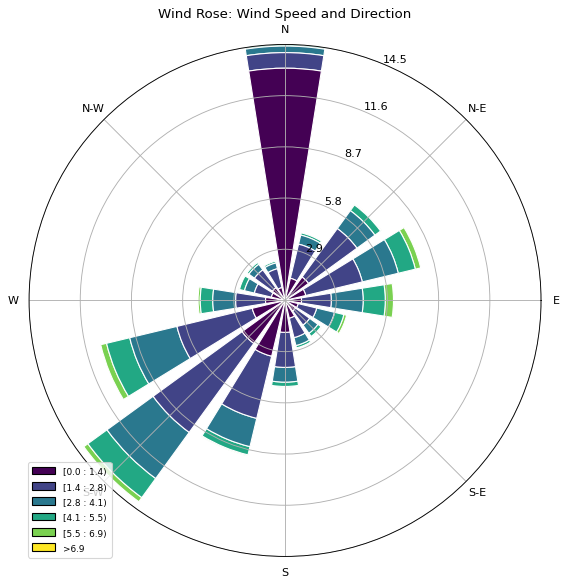

In [21]:
# Plot Wind Rose
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title("Wind Rose: Wind Speed and Direction")
ax.set_legend()
plt.show()

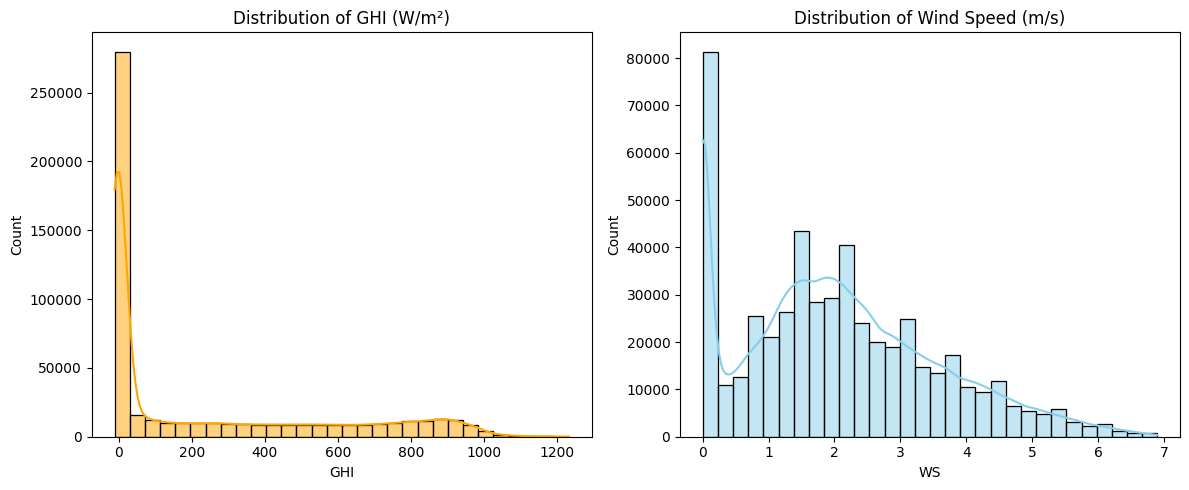

In [22]:
# #Histogram of GHI and Wind Speed
# Histogram for GHI
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['GHI'], bins=30, kde=True, color='orange')
plt.title("Distribution of GHI (W/m²)")

# Histogram for WS (Wind Speed)
plt.subplot(1, 2, 2)
sns.histplot(df['WS'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Wind Speed (m/s)")

plt.tight_layout()
plt.show()

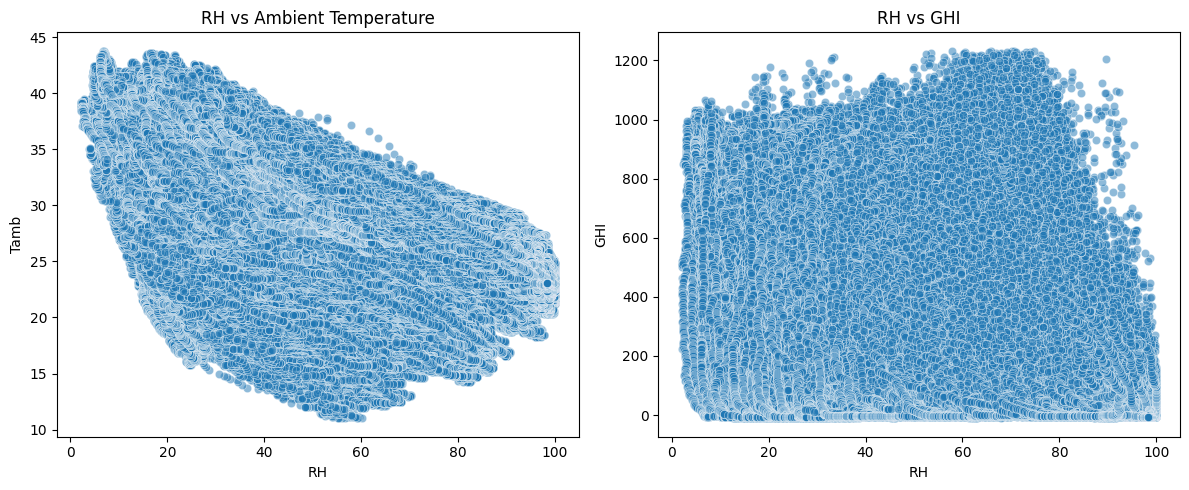

In [23]:
#Temperature & Humidity Influence
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.5)
plt.title("RH vs Ambient Temperature")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.5)
plt.title("RH vs GHI")

plt.tight_layout()
plt.show()


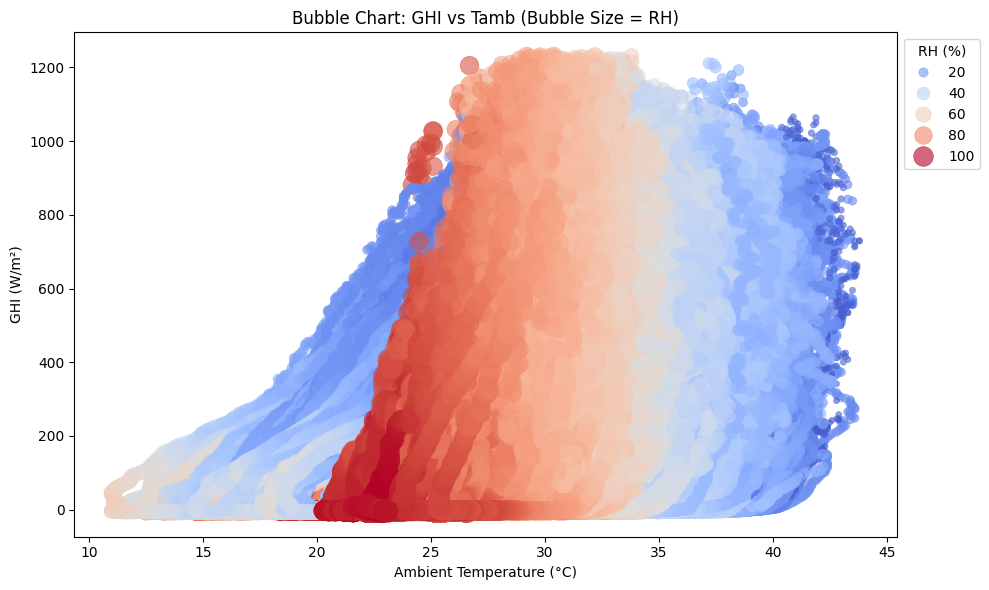

In [24]:
# Bubble Chart: GHI vs Tamb, Bubble Size = RH or BP
plt.figure(figsize=(10, 6))
# Bubble chart: RH as bubble size
sns.scatterplot(data=df, x='Tamb', y='GHI', size='RH', hue='RH',
                palette='coolwarm', alpha=0.6, edgecolor=None, sizes=(10, 200))

plt.title("Bubble Chart: GHI vs Tamb (Bubble Size = RH)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.legend(title="RH (%)", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


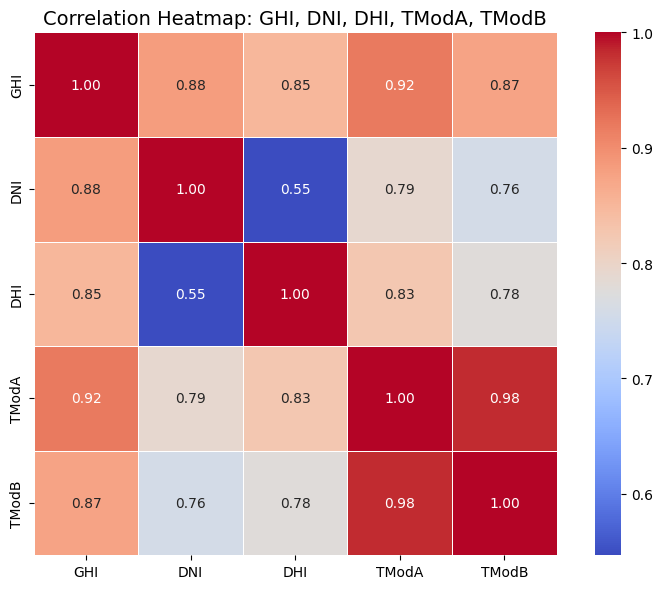

In [25]:
# Select relevant numeric columns
cols_of_interest = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
df_subset = df[cols_of_interest]

# Compute correlation matrix
corr_matrix = df_subset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

# Title and layout
plt.title("Correlation Heatmap: GHI, DNI, DHI, TModA, TModB", fontsize=14)
plt.tight_layout()
plt.show()

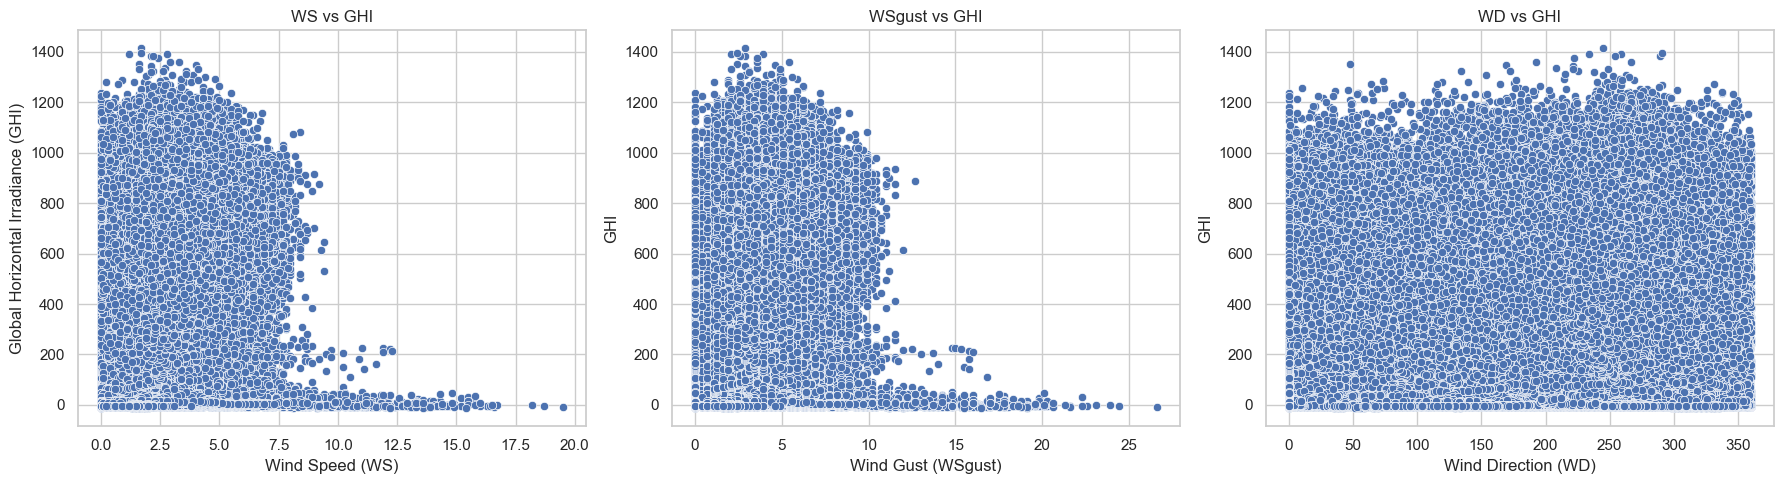

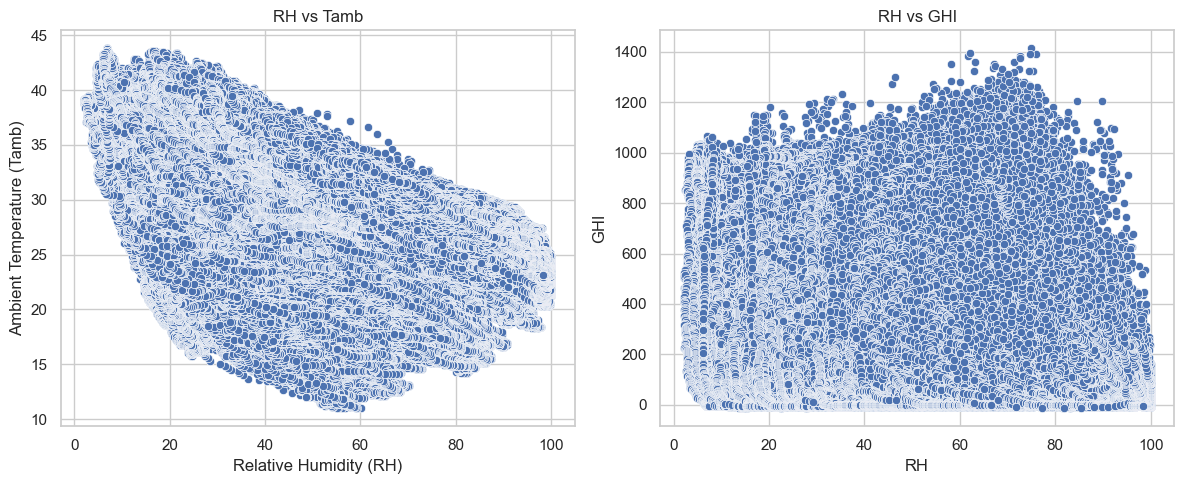

In [26]:

# Set plot style
sns.set(style="whitegrid")

# ========== 1. WS, WSgust, WD vs. GHI ==========
fig1, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df, x='WS', y='GHI', ax=axes[0])
axes[0].set_title('WS vs GHI')
axes[0].set_xlabel('Wind Speed (WS)')
axes[0].set_ylabel('Global Horizontal Irradiance (GHI)')

sns.scatterplot(data=df, x='WSgust', y='GHI', ax=axes[1])
axes[1].set_title('WSgust vs GHI')
axes[1].set_xlabel('Wind Gust (WSgust)')
axes[1].set_ylabel('GHI')

sns.scatterplot(data=df, x='WD', y='GHI', ax=axes[2])
axes[2].set_title('WD vs GHI')
axes[2].set_xlabel('Wind Direction (WD)')
axes[2].set_ylabel('GHI')

plt.tight_layout()
plt.show()

# ========== 2. RH vs Tamb and RH vs GHI ==========
fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=df, x='RH', y='Tamb', ax=axes[0])
axes[0].set_title('RH vs Tamb')
axes[0].set_xlabel('Relative Humidity (RH)')
axes[0].set_ylabel('Ambient Temperature (Tamb)')

sns.scatterplot(data=df, x='RH', y='GHI', ax=axes[1])
axes[1].set_title('RH vs GHI')
axes[1].set_xlabel('RH')
axes[1].set_ylabel('GHI')

plt.tight_layout()
plt.show()

In [ ]:
from windrose import WindroseAxes


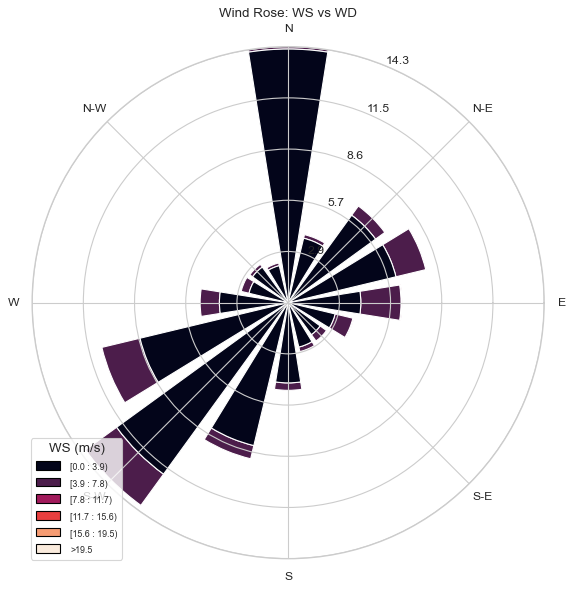

In [32]:
# Drop rows with missing WS or WD
df = df.dropna(subset=['WS', 'WD'])

# Create wind rose
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="WS (m/s)")
plt.title("Wind Rose: WS vs WD")
plt.show()

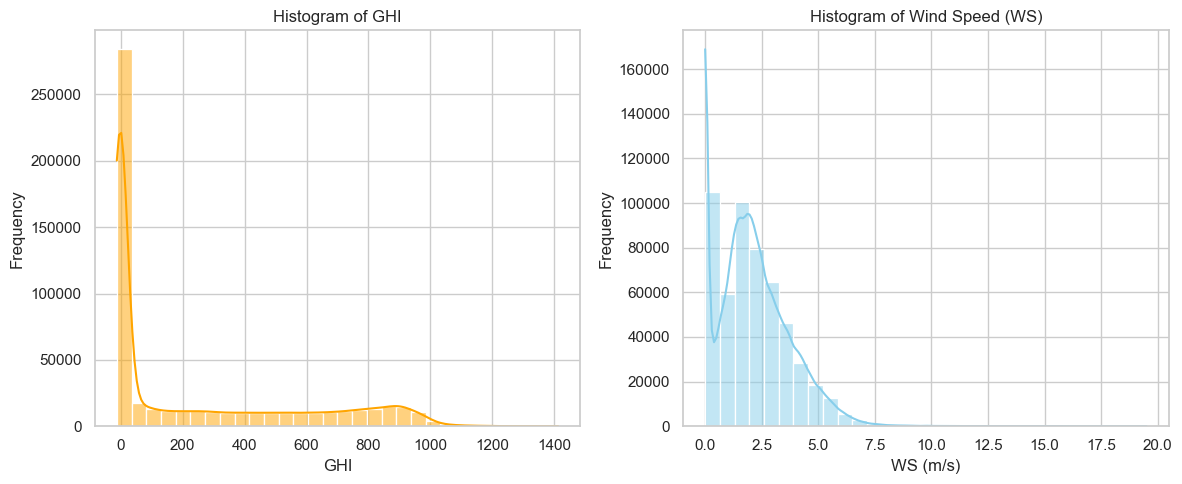

In [33]:
# Histogram for GHI and WS
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['GHI'], bins=30, kde=True, ax=axes[0], color='orange')
axes[0].set_title('Histogram of GHI')
axes[0].set_xlabel('GHI')
axes[0].set_ylabel('Frequency')

sns.histplot(df['WS'], bins=30, kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Histogram of Wind Speed (WS)')
axes[1].set_xlabel('WS (m/s)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [35]:
# Correlation with RH
correlations = df[['RH', 'Tamb', 'GHI']].corr()
print(correlations)

            RH      Tamb       GHI
RH    1.000000 -0.414842 -0.360029
Tamb -0.414842  1.000000  0.547513
GHI  -0.360029  0.547513  1.000000


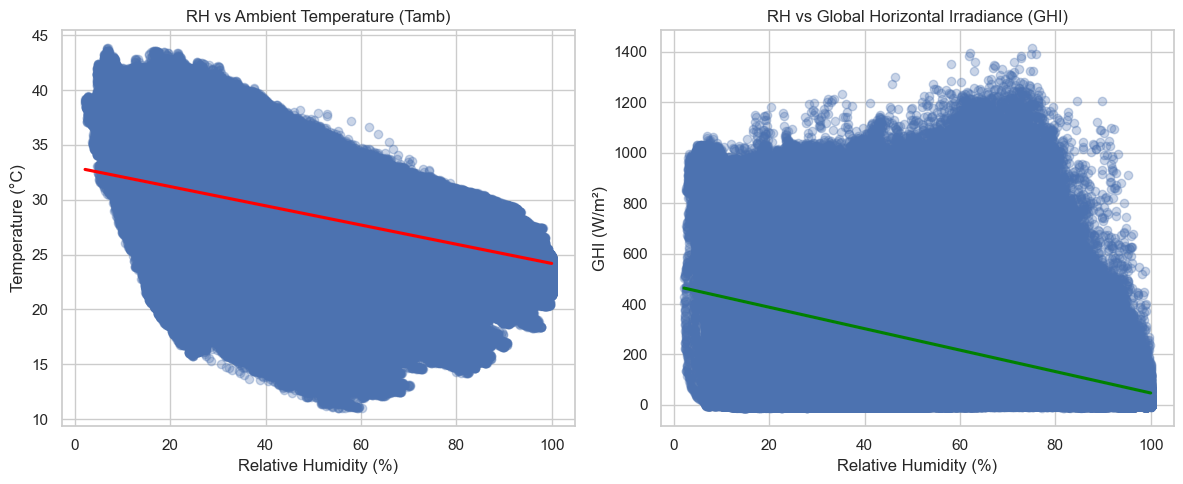

In [36]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# RH vs Tamb
sns.regplot(data=df, x='RH', y='Tamb', ax=axes[0], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
axes[0].set_title('RH vs Ambient Temperature (Tamb)')
axes[0].set_xlabel('Relative Humidity (%)')
axes[0].set_ylabel('Temperature (°C)')

# RH vs GHI
sns.regplot(data=df, x='RH', y='GHI', ax=axes[1], scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
axes[1].set_title('RH vs Global Horizontal Irradiance (GHI)')
axes[1].set_xlabel('Relative Humidity (%)')
axes[1].set_ylabel('GHI (W/m²)')

plt.tight_layout()
plt.show()

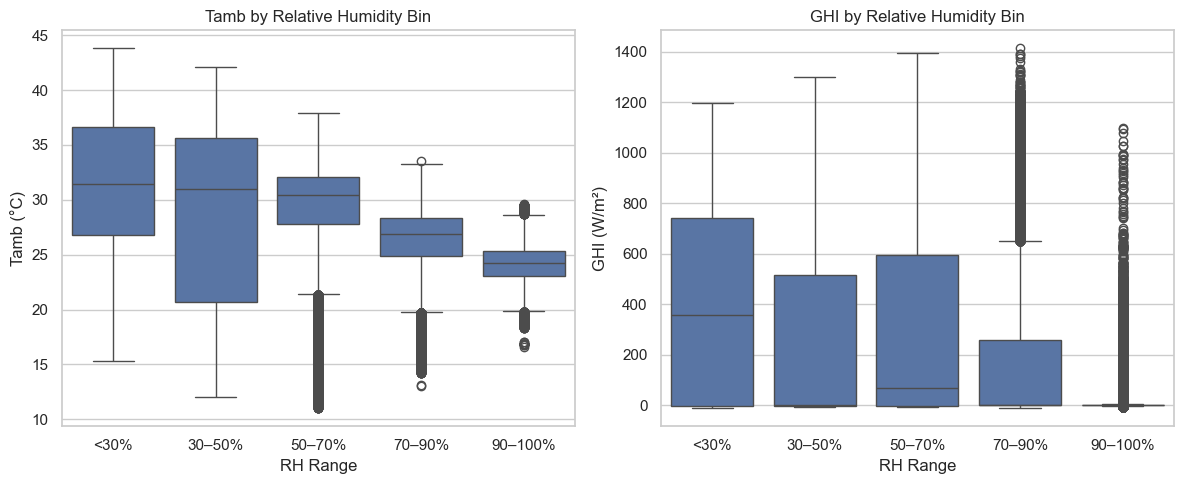

In [37]:
# Bin RH into categories
df['RH_bin'] = pd.cut(df['RH'], bins=[0, 30, 50, 70, 90, 100], labels=['<30%', '30–50%', '50–70%', '70–90%', '90–100%'])

# Boxplot for Tamb and GHI per RH bin
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x='RH_bin', y='Tamb', data=df, ax=axes[0])
axes[0].set_title('Tamb by Relative Humidity Bin')
axes[0].set_xlabel('RH Range')
axes[0].set_ylabel('Tamb (°C)')

sns.boxplot(x='RH_bin', y='GHI', data=df, ax=axes[1])
axes[1].set_title('GHI by Relative Humidity Bin')
axes[1].set_xlabel('RH Range')
axes[1].set_ylabel('GHI (W/m²)')

plt.tight_layout()
plt.show()

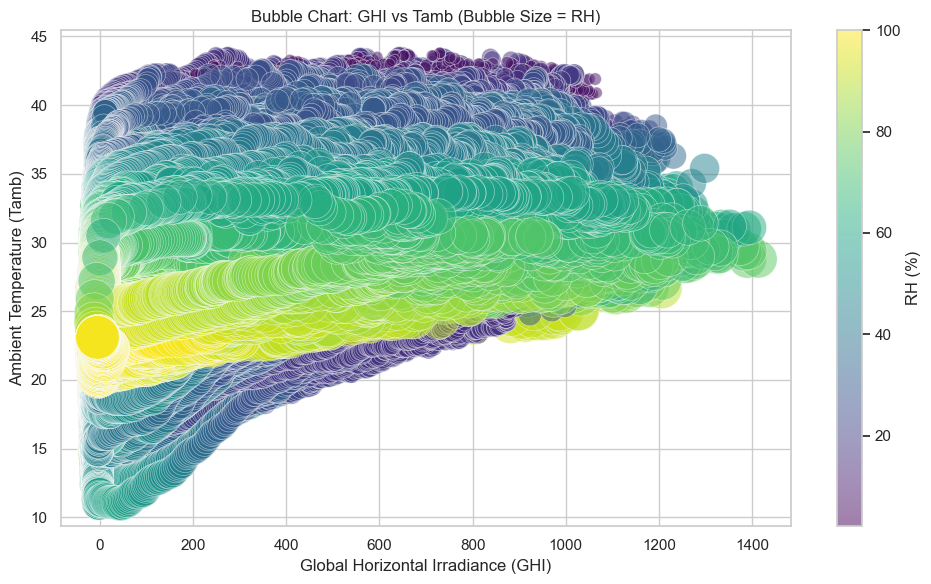

In [38]:
# Drop rows with missing values
df = df.dropna(subset=['GHI', 'Tamb', 'RH'])  # Use 'BP' instead of 'RH' if needed

# Scale RH for bubble size
bubble_size = df['RH'] / df['RH'].max() * 1000  # adjust multiplier for visibility

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['GHI'], df['Tamb'],
    s=bubble_size,
    alpha=0.5,
    c=df['RH'],  # or use 'BP' here
    cmap='viridis',
    edgecolors='w',
    linewidths=0.5
)

plt.colorbar(scatter, label='RH (%)')  # or label='BP (hPa)'
plt.title('Bubble Chart: GHI vs Tamb (Bubble Size = RH)')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.grid(True)
plt.tight_layout()
plt.show()